Ma trận X (Thiết kế):
 [[1. 1. 3.]
 [1. 2. 4.]
 [1. 3. 5.]
 [1. 4. 6.]
 [1. 5. 7.]]
ma tran X.T [[1. 1. 1. 1. 1.]
 [1. 2. 3. 4. 5.]
 [3. 4. 5. 6. 7.]]
ma tran X.T @ X [[  5.  15.  25.]
 [ 15.  55.  85.]
 [ 25.  85. 135.]]
ma tran X.T @ X chuyen vi  [[ 0.2        -0.26666667  0.13333333]
 [-0.26666667  0.35833333 -0.175     ]
 [ 0.13333333 -0.175       0.09166667]]
ma tran X.T @ y [ 300.  950. 1550.]
Hệ số chặn (w0): 13.333333333333263
Hệ số góc (w1): -10.833333333333314
Hệ số góc (w2): 15.83333333333334
Giá trị dự đoán (y_pred): [50. 55. 60. 65. 70.]
Sai số trung bình bình phương (MSE): 1.676171651413606e-27


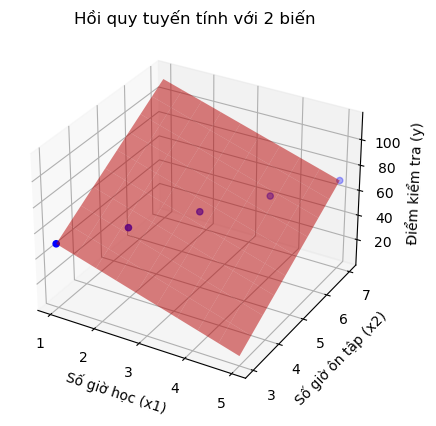

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dữ liệu đầu vào (x1, x2) và đầu ra (y)
x1 = np.array([1, 2, 3, 4, 5])  # Số giờ học
x2 = np.array([3, 4, 5, 6, 7])  # Số giờ ôn tập
y = np.array([50, 55, 60, 65, 70])  # Điểm kiểm tra

# Tạo ma trận thiết kế X (bao gồm cột chặn và x1, x2)
X = np.vstack([np.ones(len(x1)), x1, x2]).T

# In ra ma trận X để kiểm tra
print("Ma trận X (Thiết kế):\n", X)

# Tính hệ số hồi quy (theta) bằng công thức chuẩn tắc (pseudo-inverse)
print("ma tran X.T \n",X.T)
print('ma tran X.T @ X \n',X.T @ X)
print("ma tran X.T @ X chuyen vi \n",np.linalg.pinv(X.T @ X))
print("ma tran X.T @ y \n",X.T @ y)
theta = np.linalg.pinv(X.T @ X) @ X.T @ y  # Sử dụng pseudo-inverse
print("theta \n", theta)
# Lấy các hệ số w0, w1, w2 từ kết quả tính toán
w0, w1, w2 = theta

# In ra các hệ số
print(f"Hệ số chặn (w0): {w0}")
print(f"Hệ số góc (w1): {w1}")
print(f"Hệ số góc (w2): {w2}")

# Dự đoán giá trị y cho tất cả các giá trị (x1, x2)
y_pred = X @ theta  # y_hat = X @ theta

# In ra giá trị dự đoán
print("Giá trị dự đoán (y_pred):", y_pred)

# Tính sai số MSE
mse = np.mean((y - y_pred) ** 2)  # Công thức MSE
print(f"Sai số trung bình bình phương (MSE): {mse}")

# Trực quan hóa dữ liệu thực và mô hình hồi quy 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dữ liệu thực
ax.scatter(x1, x2, y, color='blue', label='Dữ liệu thực')

# Tạo lưới để vẽ mặt phẳng hồi quy
x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 10), np.linspace(min(x2), max(x2), 10))
y_grid = w0 + w1 * x1_grid + w2 * x2_grid  # Mặt phẳng hồi quy

# Vẽ mặt phẳng hồi quy
ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5)

# Thêm nhãn và tiêu đề
ax.set_xlabel('Số giờ học (x1)')
ax.set_ylabel('Số giờ ôn tập (x2)')
ax.set_zlabel('Điểm kiểm tra (y)')
ax.set_title('Hồi quy tuyến tính với 2 biến')

# Hiển thị đồ thị
plt.show()
